Feature selection is the process of choosing the most relevant features (columns) from your dataset to build better machine learning models. It helps you keep only the useful stuff and ignore the noise.

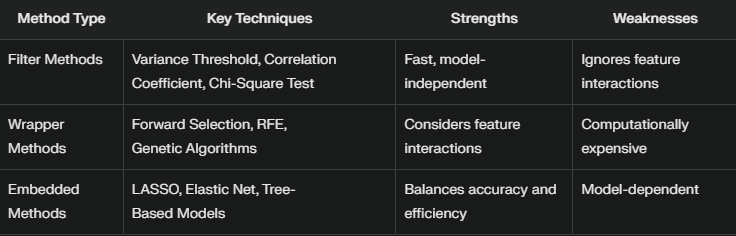

# <u> Filter Methods </u>

# Correlation (for numerical features)

Two use cases: 
Feature vs Target
Feature vs Feature

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [2, 4, 6, 8, 10],  # Perfectly correlated with A
    'C': [5, 3, 6, 2, 1],   # Not correlated
    'Target': [10, 20, 30, 40, 50]
})

In [9]:
correlation_with_target = df.corr(numeric_only=True)['Target']
print(correlation_with_target)

A         1.000000
B         1.000000
C        -0.686244
Target    1.000000
Name: Target, dtype: float64


# Variance Threshold (for low-variance features)

In [7]:
from sklearn.feature_selection import VarianceThreshold

import numpy as np
X = np.array([
    [0, 2, 0, 1],
    [0, 1, 4, 1],
    [0, 1, 1, 1]
])

selector = VarianceThreshold(threshold=0.0)
X_selected = selector.fit_transform(X)
X_selected

array([[2, 0],
       [1, 4],
       [1, 1]])

# <u>Wrapper Methods</u>

Use a predictive model (like LinearRegression, RandomForest, etc.)

Train models multiple times with different subsets of features

Choose the best feature set based on model performance (accuracy, RMSE, etc.)

## RFE (Recursive Feature Elimination)

In [15]:
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [2, 4, 6, 9, 10],
    'C': [5, 3, 6, 2, 1],
    'Target': [10, 20, 30, 40, 50]
})
df

,A,B,C,Target
0,1,2,5,10
1,2,4,3,20
2,3,6,6,30
3,4,9,2,40
4,5,10,1,50


In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df[['A','B','C']]
y = df['Target']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X,y)

X.columns[rfe.support_]

Index(['A'], dtype='object')

## Stepwise Selection (Forward / Backward)

Forward: Add best feature (lowest p-value)

🧹 Backward: Drop worst feature (highest p-value)

🔁 Repeat until no changes

# <u>Embedded Methods</u>

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt

# Create sample dataset
np.random.seed(42)

# 6 features, some with no relation to target
X = pd.DataFrame({
    'feature_1': np.random.rand(100),
    'feature_2': np.random.rand(100),
    'feature_3': np.random.rand(100),
    'feature_4': np.random.rand(100),
    'feature_5': np.random.rand(100),  # noisy
    'feature_6': np.random.rand(100)   # noisy
})

# Create target: only feature_1, feature_3 matter
y = 3 * X['feature_1'] + 5 * X['feature_3'] + np.random.rand(100)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [18]:
# Lasso (L1) - feature selection
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Ridge (L2) - coefficient shrinkage
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


Ridge()

In [19]:
# Compare coefficients
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
ridge_coef = pd.Series(ridge.coef_, index=X.columns)

print("🔍 Lasso Coefficients (zero = eliminated):")
print(lasso_coef)

print("\n📉 Ridge Coefficients (shrinked, but none zero):")
print(ridge_coef)


🔍 Lasso Coefficients (zero = eliminated):
feature_1    1.863541
feature_2   -0.000000
feature_3    3.786324
feature_4   -0.000000
feature_5    0.000000
feature_6   -0.000000
dtype: float64

📉 Ridge Coefficients (shrinked, but none zero):
feature_1    2.559841
feature_2   -0.208325
feature_3    4.321178
feature_4   -0.238845
feature_5    0.221457
feature_6   -0.068063
dtype: float64


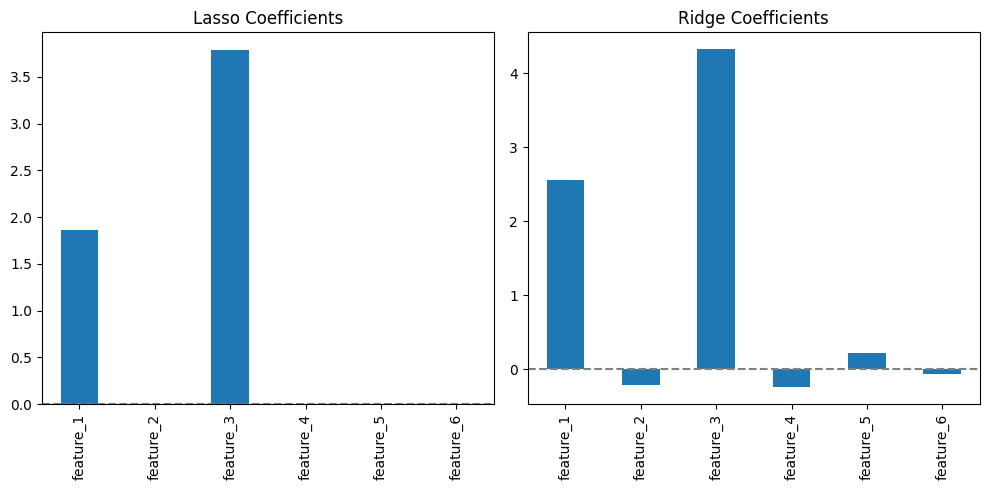

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
lasso_coef.plot(kind='bar', title='Lasso Coefficients')
plt.axhline(0, color='gray', linestyle='--')

plt.subplot(1, 2, 2)
ridge_coef.plot(kind='bar', title='Ridge Coefficients')
plt.axhline(0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()
